# Odpowiedzi do zadań
## Zadanie 1. Jakie oceny zostały uzyskane dla następujących strategii usuwania/uzupełniania danych:
1. usunięcie wierszy : 188347.55408238468
2. usunięcie kolumn: 197764.87290298525 \
Zastanów się, które z tych podejść powinno być zastosowane jeśli chcemy stworzyć klasyfikator predykujący ceny nieruchomości? \
 Odp.: Powinniśmy usuwać wiersze z brakującymi danymi - zostawiamy kolumny, by mieć czynniki wpływające na zmianę cen nieruchomości, jedynie usuwamy wiersze, gdzie nie ma dostarczonych odpowiednich danych. \
 3. uzupełnienie braków 0: 188836.6600699558 \ 
 Kiedy wypełnianie wartością sąsiednią ma sens? \
 Odp.: Kiedy wyniki są sekwencyjne np. przeprowadzanie eksperymentu, gdzie zbierane są punkty i w pewnych miejscach brakuje danych z przyczyn losowych (np. bardzo krótkie zerwanie połączenia z siecią), wówczas możemy przypuszczać, że brakujące dane są zbliżone do danych sąsiadujących
 4. uzupełnienie braków wartością sąsiednią: 194202.36065747947
 5. uzupełnienie braków medianą: 189001.18935602077 \
 Tu również można uzupełniać dane medianą / średnią jeśli brak danych jest wynikiem losowych braków pomiarów, a te są sekwencyjne
 6. dodatnie dnia tygodnia kiedy nastąpiła sprzedaż (na danych, gdzie zostały usunięte wiersze z brakującymi danymi): 188558.94974205433
 7. dodanie nowej cechy (np. CouncilArea) za pomocą LabelEncoder (na danych, gdzie zostały usunięte wiersze): 186997.84765315522 
 8. dodanie nowej cechy (np. CouncilArea) za pomocą BinaryEncoder : 188135.07507139567

## Zadanie 2. które podejście/podejścia wydają się być najbardziej obiecujące w odniesieniu do estymacji cen nieruchomości (w odniesieniu do uzupełniania braków w poszczególnych kolumnach oraz tworzenia nowych cech bazujących na zmiennych nominalnych?

Bazując na wynikach zamieszczonych powyżej najbardziej obiecujący wynik dawało podejście dodania nowej cechy za pomocą LabelEncodera na danych wyczszczonych poprzez usunięcie wierszy z brakującymi danymi. \
Przy danych, gdzie liczba braków w stosunku do całego zebranego zestawu danych jest znikoma (np. brak informacji Car stanowi jedynie niecały procent) można bez utraty cennych informacji usunąć wiersze z tymi brakującymi danymi. Natomiast przy BuilidingArea procent występowania brakujących danych wynosi już ponad 47%, w związku z czym brakujące dane z tej kolumny warto uzupełnić o średnią/medianę. Przy kolumnach takich jak "CouncilArea" lub "Regionname" można zastosować LabelBinarizer w celu utworzenia nowych binarnych kolumn. To pozwoli uwzględnić wpływ różnych obszarów administracyjnych i regionów na ceny nieruchomości. \
Na końcu Notebooka umieszczono kod odpowiadający za uzupełnienie medianą brakujących danych dla kolumn 'Car', 'BuildingArea', 'YearBuilt', wykorzystanie enkodera binarnego dla 'CouncilArea', 'Regionname', dodanie dni tygodnia do zestawu danych i estymację cen nieruchomości. Pod koniec trenowany jest model regresji losowego lasu i ocena następuje na bazie kroswalidacji. Uzyskany wynik średniegi błędu bezwzględnego (MAE) po kroswalidacji: 187185.20169480093.

# Czyszczenie danych i skuteczność klasyfikacji

In [59]:
# Wczytanie danych melb_data.csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('melb_data.csv')
print(df.to_string()) 

                   Suburb                      Address  Rooms Type      Price Method                  SellerG        Date  Distance  Postcode  Bedroom2  Bathroom   Car  Landsize  BuildingArea  YearBuilt        CouncilArea  Lattitude  Longtitude                  Regionname  Propertycount
0              Abbotsford                 85 Turner St      2    h  1480000.0      S                   Biggin   3/12/2016       2.5    3067.0       2.0       1.0   1.0     202.0           NaN        NaN              Yarra  -37.79960   144.99840       Northern Metropolitan         4019.0
1              Abbotsford              25 Bloomburg St      2    h  1035000.0      S                   Biggin   4/02/2016       2.5    3067.0       2.0       1.0   0.0     156.0       79.0000     1900.0              Yarra  -37.80790   144.99340       Northern Metropolitan         4019.0
2              Abbotsford                 5 Charles St      3    h  1465000.0     SP                   Biggin   4/03/2017       2.5    3

Spróbuj określić dla każdej kolumny procent występowania wartości brakujących. Wyświetl je w postaci tabeli, gdzie indeksem jest nazwa kolumny, a kolumnami procent braków oraz całkowita liczba braków (możesz użyć metody pd.concat)

In [60]:
# Wyznaczenie wartości pustych - nazwa kolumny - liczba 
missing_values_count = df.isnull().sum()
# Obliczanie procentu braków dla każdej kolumny
missing_percent = (missing_values_count / len(df)) * 100
result_missing = pd.concat([missing_percent, missing_values_count], axis=1)
result_missing.columns = ['Procent braków', 'Liczba braków']
result_missing

Procent braków  Liczba braków
Suburb               0.000000              0
Address              0.000000              0
Rooms                0.000000              0
Type                 0.000000              0
Price                0.000000              0
Method               0.000000              0
SellerG              0.000000              0
Date                 0.000000              0
Distance             0.000000              0
Postcode             0.000000              0
Bedroom2             0.000000              0
Bathroom             0.000000              0
Car                  0.456554             62
Landsize             0.000000              0
BuildingArea        47.496318           6450
YearBuilt           39.580265           5375
CouncilArea         10.081001           1369
Lattitude            0.000000              0
Longtitude           0.000000              0
Regionname           0.000000              0
Propertycount        0.000000              0

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


def score_dataset(x_train, x_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(x_train, y_train)
    preds = model.predict(x_valid)
    return mean_absolute_error(y_valid, preds)

Podejście 1: usunięcie kolumn/wierszy zawierających przynajmniej 1 element pusty - przetestuj oba podejścia:

In [62]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.impute import SimpleImputer


train_df, test_df = train_test_split(df, test_size=0.7, random_state=42)

# Oryginalne indeksy - do późniejszego sprawdzenia indeksów zdropowanych wierszy
original_indices = df.index.tolist()

# czyszczenie danych
df_cleaned_rows_train = train_df.dropna()
df_cleaned_rows_test = test_df.dropna()

df_cleaned_cols_train = train_df.dropna(axis=1)
df_cleaned_cols_test = df_cleaned_rows_test.dropna(axis=1)

cols_x = df_cleaned_rows_train.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
print(score_dataset(df_cleaned_rows_train[cols_x], df_cleaned_rows_test[cols_x], df_cleaned_rows_train[cols_y], df_cleaned_rows_test[cols_y]))

# Które wiersze zostały usunięte?
removed_indices = list(set(original_indices) - set(df_cleaned_rows_train.index.tolist()))
print(f"Indeksy wierszy, które zostały usunięte: {removed_indices}")


188347.55408238468
Indeksy wierszy, które zostały usunięte: [0, 2, 3, 5, 8, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 160, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 208, 209, 210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245

### W jaki sposób usunąć tylko wiersze jeśli wartości puste są w BuildingArea
 df_cleaned_building_area_train = train_df.dropna(subset=['BuildingArea']) \
 df_cleaned_building_area_test = test_df.dropna(subset=['BuildingArea'])

Podejście 2: wypełnienie pustych wartości np. zerami lub wartością, która poprzedza wartość brakującą

In [63]:
df_cleaned_dropped_zeros_train = train_df.fillna(0)
df_cleaned_dropped_zeros_test = test_df.fillna(0)

# Wartosc sasiednia
train_df_cleaned_neighbour = train_df.fillna(method='bfill', axis=0).fillna(0)
test_df_cleaned_neighbour = test_df.fillna(method='bfill', axis=0).fillna(0)

cols_x = train_df_cleaned_neighbour.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
print(score_dataset(train_df_cleaned_neighbour[cols_x], test_df_cleaned_neighbour[cols_x], train_df_cleaned_neighbour[cols_y], test_df_cleaned_neighbour[cols_y]))

/tmp/ipykernel_8362/1073707507.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df_cleaned_neighbour = train_df.fillna(method='bfill', axis=0).fillna(0)
/tmp/ipykernel_8362/1073707507.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df_cleaned_neighbour = test_df.fillna(method='bfill', axis=0).fillna(0)


194202.36065747947


Podejście 3: podstawienie wartości średniej/mediany/mody:

In [64]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median') 
df_train_numeric = train_df.select_dtypes(include=[np.number]).copy()
df_test_numeric = test_df.select_dtypes(include=[np.number]).copy()
df_train_numeric.loc[:] = imp_mean.fit_transform(df_train_numeric)  # dopasowanie parametrów (średnich) i transformacja zbioru uczącego
df_test_numeric[:]  = imp_mean.transform(df_test_numeric)

cols_x = df_train_numeric.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
print(score_dataset(df_train_numeric[cols_x], df_test_numeric[cols_x], df_train_numeric[cols_y], df_test_numeric[cols_y]))

189001.18935602077


dodatnie dnia tygodnia kiedy nastąpiła sprzedaż

In [65]:
# Dodawanie dni tygodnia po tym jak usunęliśmy brakujące wiersze
df_cleaned_rows_train['Date'] = pd.to_datetime(df_cleaned_rows_train['Date'], format='%d/%m/%Y')
df_cleaned_rows_train['DayOfWeek'] = df_cleaned_rows_train['Date'].dt.dayofweek

df_cleaned_rows_test['Date'] = pd.to_datetime(df_cleaned_rows_test['Date'], format='%d/%m/%Y')
df_cleaned_rows_test['DayOfWeek'] = df_cleaned_rows_test['Date'].dt.dayofweek

cols_x = df_cleaned_rows_train.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
print(score_dataset(df_cleaned_rows_train[cols_x], df_cleaned_rows_test[cols_x], df_cleaned_rows_train[cols_y], df_cleaned_rows_test[cols_y]))

/tmp/ipykernel_8362/3800162169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_rows_train['Date'] = pd.to_datetime(df_cleaned_rows_train['Date'], format='%d/%m/%Y')
/tmp/ipykernel_8362/3800162169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_rows_train['DayOfWeek'] = df_cleaned_rows_train['Date'].dt.dayofweek
/tmp/ipykernel_8362/3800162169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

188558.94974205433


Wykreśl histogram liczby dokonanych transakcji w zależności od dnia tygodnia.

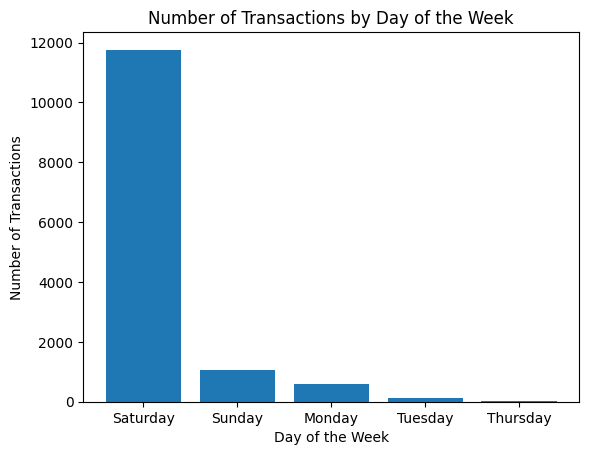

In [66]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Ekstrakcja dnia tygodnia z daty 
df['DayOfWeek'] = df['Date'].dt.day_name()

# Liczenie transakcji per dzień 
transactions_by_day = df['DayOfWeek'].value_counts()

# Historgram
plt.bar(transactions_by_day.index, transactions_by_day)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Day of the Week')
plt.show()

dodanie nowej cechy (np. CouncilArea) za pomocą LabelEncoder

In [67]:
# dodanie nowej cechy (np. CouncilArea) za pomocą LabelEncoder
from sklearn.preprocessing import LabelEncoder


# Make copy to avoid changing original data 
label_train = df_cleaned_rows_train.copy()
label_test = df_cleaned_rows_test.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
col='CouncilArea'
label_encoder.fit(df[col])
label_train[col] = label_encoder.transform(label_train[col])
label_test[col] = label_encoder.transform(label_test[col])

cols_x = label_train.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
print(score_dataset(label_train[cols_x], label_test[cols_x], label_train[cols_y], label_test[cols_y]))

186997.84765315522


Zastanów się czy podejście to sprawdzi się w celu uwzględnienia w predyktorze ceny nazw obszarów administracyjnych, lub dni tygodnia w których nastąpiła sprzedaż? \
LabelEncoding sprawdzi się, jeśli zmiennej nominalnej można przypisać wartości liczbowe w sposób, który odzwierciedla ich naturalny porządek. Na przykład, jeśli obszary administracyjne mają pewien porządek (np. od najbardziej prestiżowego do najmniej prestiżowego), to Label Encoding może uwzględnić ten porządek. \
W przypadku, gdy kategorie posiadają naturalny porządek (brak, słaby, silny, bardzo silny wiatr), Label Encoding może być stosowany, aby uwzględnić ten porządek w modelu, choć BinaryEncoding wydaje się być  bardziej stosowny.

dodanie nowej cechy (np. CouncilArea) za pomocą BinaryEncoder

In [94]:
# LabelBinarizer do zakodowania zmiennej nominalnej CouncilArea za pomocą kodowania binarnego
from sklearn.preprocessing import LabelBinarizer

# Wykorzystanie danych wyczyszczonych poprzez usunięcie wierszy z brakującymi danymi
label_train = df_cleaned_rows_train.copy()
label_test = df_cleaned_rows_test.copy()

label_binarizer = LabelBinarizer()

col = 'CouncilArea'

# Dopasowujemy enkoder do danych treningowych i przekształcamy je
lb_results_train = label_binarizer.fit_transform(label_train[col])
lb_results_train_df = pd.DataFrame(lb_results_train, columns=label_binarizer.classes_)
# Dokładamy zakodowane wartości jako dodatkowe kolumny do danych treningowych
label_train_encoded = pd.concat([label_train.reset_index(drop=True), lb_results_train_df.reset_index(drop=True)], axis=1)

# Przekształcamy dane testowe przy użyciu już dopasowanego enkodera
lb_results_test = label_binarizer.transform(label_test[col])
lb_results_test_df = pd.DataFrame(lb_results_test, columns=label_binarizer.classes_)

# Dokładamy zakodowane wartości jako dodatkowe kolumny do danych testowych
label_test_encoded = pd.concat([label_test.reset_index(drop=True), lb_results_test_df.reset_index(drop=True)], axis=1)

cols_x = label_train_encoded.select_dtypes(include=[np.number]).columns.difference(['Price'])
cols_y = 'Price'
print(score_dataset(label_train_encoded[cols_x], label_test_encoded[cols_x], label_train_encoded[cols_y], label_test_encoded[cols_y]))

188135.07507139567


Dla obszarów administracyjnych, jeśli nie da się wyodrębnić naturalnego porządku, enkoder binarny może okazać się bardzo stosowny. Stosowanie enkodera binarnego pozwala uniknąć błędnego przypisania porządku.

Podmień wczytywany plik na melb_data_distorted.csv, w którym w niektórych kolumnach tekstowych zostały wprowadzone typowe pomyłki lub różnice w zapisie.

Spróbuj zastosować funkcję replace_matches_in_column do scalenia elementów w kolumnie Suburb, pamiętaj, że trzeba ją wywołać osobno dla każdego unikalnego elementu string_to_match. Ile unikalnych elementów zostanie, jeśli minimalny próg podobieństwa ustalisz na wartość 90? \
Odpowiedź: Liczba unikalnych elementów przed zastosowaniem funkcji: 1321, po zastosowaniu funkcji: 664

In [95]:
import fuzzywuzzy.process
df_distorted = pd.read_csv('melb_data_distorted.csv')

def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match

# Lista unikalnych elementow 'suburb'
unique_suburbs = df_distorted['Suburb'].unique()
# Liczba unikalnych elementow 'suburb' - przed replace_matches_in_column
num_unique_suburbs = df_distorted['Suburb'].nunique()

print(f"Liczba unikalnych suburbs przed aplikacja funkcji: {num_unique_suburbs}") # Odpowiedz: 1321

# Aplikowanie funkcji
for suburb in unique_suburbs:
    replace_matches_in_column(df_distorted, 'Suburb', suburb, min_ratio=90)

print(f"Liczba unikalnych suburbs po aplikowaniu funkcji: {df_distorted['Suburb'].nunique()}") # Odpowiedz: 664




/home/agnieszka/Documents/EAD/ead_venv/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Liczba unikalnych suburbs przed aplikacja funkcji: 1321
Liczba unikalnych suburbs po aplikowaniu funkcji: 664


In [96]:
import fuzzywuzzy.process


fuzzywuzzy.process.extract('Ostrów',['ostrow', 'Ostrów Wlkp', 'ostrów wlkp', 'Ostrzeszów'])

[('ostrow', 91), ('Ostrów Wlkp', 90), ('ostrów wlkp', 90), ('Ostrzeszów', 72)]

In [97]:
# zmiana na małe litery
df['Suburb'] = df['Suburb'].str.lower()
# usunięcie końcowych spacji
df['Suburb'] = df['Suburb'].str.strip()

In [99]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Uzupełnienie braków dla kolumn numerycznych
numeric_cols = ['Car', 'BuildingArea', 'YearBuilt']
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Tworzenie nowych cech dla kolumn nominalnych
nominal_cols = ['CouncilArea', 'Regionname']
for col in nominal_cols:
    label_binarizer = LabelBinarizer()
    binarized_results = label_binarizer.fit_transform(df[col].astype(str))
    binarized_df = pd.DataFrame(binarized_results, columns=label_binarizer.classes_)
    df = pd.concat([df, binarized_df], axis=1)

# Tworzenie nowej cechy 'Dzień Tygodnia' z daty
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['DayOfWeek'] = df['Date'].dt.day_name()

# Wybór kolumn do modelu
model_cols = df.select_dtypes(include=[np.number]).columns.difference(['Price'])

# Modelowanie i ocena
model = RandomForestRegressor(n_estimators=100, random_state=0)
scores = cross_val_score(model, df[model_cols], df['Price'], scoring='neg_mean_absolute_error', cv=5)
mae_score = -scores.mean()

print(f"Średni Błąd Bezwgledny (MAE) po kroswalidacji: {mae_score}")


Średni Błąd Bezwgledny (MAE) po kroswalidacji: 187185.20169480093
